## 생선 분류 문제
- 도미, 빙어

In [1]:
# 도미
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

# 빙어
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

- 전체 데이터 길이 확인

In [13]:
# 도미 35개, 빙어 14개
print(len(bream_length), len(smelt_length))

35 14


## 데이터 시각화

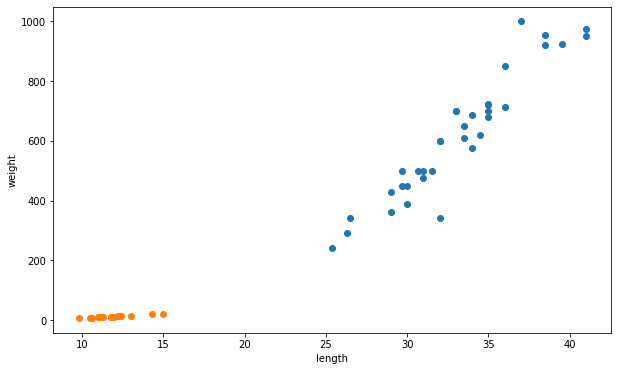

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(bream_length, bream_weight)
ax.scatter(smelt_length, smelt_weight)
ax.set_xlabel('length')
ax.set_ylabel('weight')

plt.show()

- 전체 데이터 만들기

In [6]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

print(len(length), len(weight))

49 49


### 리스트 컴프리헨션 (List Comprehension)
- 반복문 (조건문 포함)을 1줄로 처리
- 반환값은 리스트 

In [8]:
temp_text = "humanEdu"
human_letters = []
for letter in temp_text :
  human_letters.append(letter)

print(human_letters)

['h', 'u', 'm', 'a', 'n', 'E', 'd', 'u']


In [10]:
temp_text = "humanEdu"
human_letters = [letter for letter in temp_text]

print(human_letters)

['h', 'u', 'm', 'a', 'n', 'E', 'd', 'u']


In [11]:
fish_data = [[l,w] for l, w in zip(length, weight)]

print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


- 지도학습은 라벨이 필요하다. 
--> 종속변수, 타겟변수 (Response Variable, Dependent Variable)

In [24]:
# 도미 35개 1로 표시
# 빙어 14개 0로 표시
fish_target = [1] * 35 + [0] * 14
# fish_target = ["도미"] * 35 + ["빙어"] * 14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## 머신러닝 모형 구현
- KNN 구현

In [18]:
from sklearn.neighbors import KNeighborsClassifier

# 모형 불러오기
kn = KNeighborsClassifier()

# 모형 학습
kn.fit(fish_data,fish_target)

KNeighborsClassifier()

In [19]:
# 모형 평가
# 1.0 의미 ==> 100% 정확도
kn.score(fish_data, fish_target)

1.0

In [25]:
# 예측 (= 배포)
new_data = [[30, 600]]
kn.predict(new_data) # 도미로 예측함

array([1])

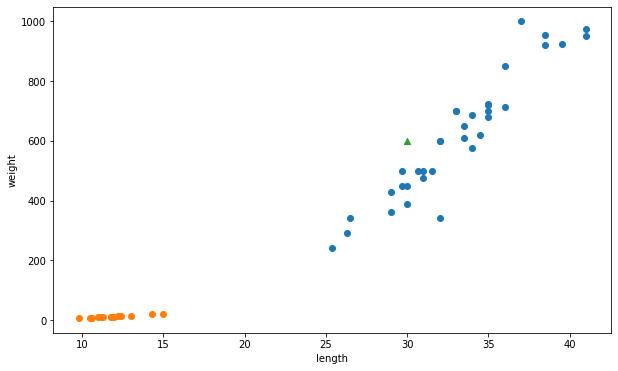

In [27]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(bream_length, bream_weight)
ax.scatter(smelt_length, smelt_weight)
ax.scatter(30,600, marker = '^')

ax.set_xlabel('length')
ax.set_ylabel('weight')

plt.show()

In [16]:
import sklearn
kn = sklearn.neighbors.KNeighborsClassifier()

In [30]:
from sklearn.neighbors import KNeighborsClassifier

# 모형 불러오기
kn = KNeighborsClassifier(n_neighbors = 17)

# 모형 학습
kn.fit(fish_data,fish_target)

# 모형 평가
# 0.71 의미 ==> 71% 정확도
kn.score(fish_data, fish_target)

1.0

In [34]:
for n in range(5,50) :
  # 최근접 이웃 개수 설정
  # print(n)
  kn.n_neighbors = n

  # 스코어 계산
  score = kn.score(fish_data,fish_target)

  print(n,score)
  
  # 1.0에 미치지 못하는 이웃 개수 경계선 구하기
  if score <1 :
    print(n,score)
    break

5 1.0
6 1.0
7 1.0
8 1.0
9 1.0
10 1.0
11 1.0
12 1.0
13 1.0
14 1.0
15 1.0
16 1.0
17 1.0
18 0.9795918367346939
18 0.9795918367346939


## 머신러닝 중요 메서드
- fit() : 훈련시 사용하는 메서드, 두개의 데이터가 들어감. 
  + 독립변수 : fish_data (길이, 몸무게)
  + 종속변수 : fish_target

- predict() : 예측할 때 사용
  + 새로운 데이터 : 독립변수만 추가

- score() : 모형의 성능 평가
  + 실전 : 평가지표 함수를 사용!

## 훈련 세트와 테스트 세트
- 기존 모델의 문제점
- 예측값, 평가지표 산출 시, 100%
- 훈련 세트 : 훈련 시에 사용되는 데이터
- 테스트 세트 : 평가 시에 사용되는 데이터

In [35]:
fish_data[:5]

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]

In [36]:
fish_data[44:]

[[12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]

In [37]:
train_input = fish_data[:35]
train_target = fish_target[:35]

test_input = fish_data[35:]
test_target = fish_target[35:]

- 모형 만들고, 모형 테스트
- Why 정확도가 0%인가?

In [39]:
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.0

### 데이터 섞기

In [45]:
import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

# print(input_arr)
print(input_arr.shape) # 길이와 무게
print(target_arr.shape) # 라벨


(49, 2)
(49,)


- 인덱스를 shuffle을 활용하여 섞기

In [46]:
np.random.seed(42) # 랜덤 고정
index = np.arange(49)
index

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])

In [47]:
np.random.shuffle(index)
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [48]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

train_target

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1])

In [49]:
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

- 적절하게 섞여 있는지 확인하는 시각화

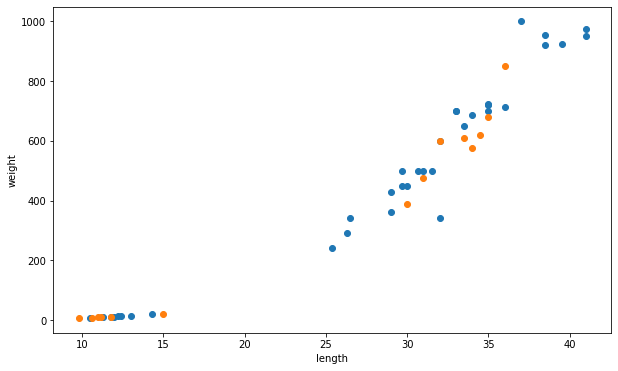

In [51]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(train_input[:,0], train_input[:,1])
ax.scatter(test_input[:,0], test_input[:,1])

ax.set_xlabel('length')
ax.set_ylabel('weight')

plt.show()

- 머신러닝 모형 개발

In [53]:
kn = KNeighborsClassifier(n_neighbors = 5)
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [54]:
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [55]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

- 주요 함수
  + seed() : 초기값이 같으면 동일한 난수를 뽑는다. 실험 재현성
  + shuffle() : 주어진 배열을 랜덤하게 섞는다.

## Scikit-Learn 라이브러리를 활용한 세트 분리

In [56]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [57]:
a_list = [1,2,3]
b_list = [4,5,6]

np.column_stack((a_list, b_list))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [58]:
fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [59]:
fish_target = np.concatenate((np.ones(35),np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


- Scikit-Learn 라이브러리가 요구하는 input 데이터 형태는 기본적으로 배열임 (리스트가 아님)
- 참조 : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split


In [61]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, random_state =42
)

print(train_input.shape, train_target.shape)

(36, 2) (36,)


In [62]:
print(test_input.shape, test_target.shape)

(13, 2) (13,)


In [63]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


- 모형 만들기

In [64]:
kn = KNeighborsClassifier(n_neighbors = 5)
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

- 수상한 도미
  + 도미 1, 빙어 0

In [66]:
#                 길이, 몸무게
print(kn.predict([[25,150]]))
# 그래프로 보면 도미이지만 머신러닝은 빙어로 예측함

[0.]


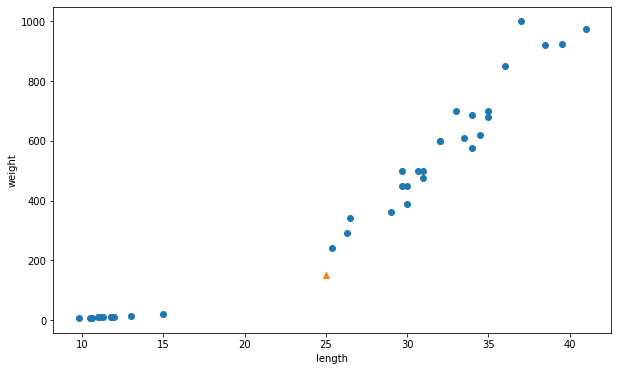

In [67]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(train_input[:,0], train_input[:,1])
ax.scatter(25,150,marker = '^')

ax.set_xlabel('length')
ax.set_ylabel('weight')

plt.show()

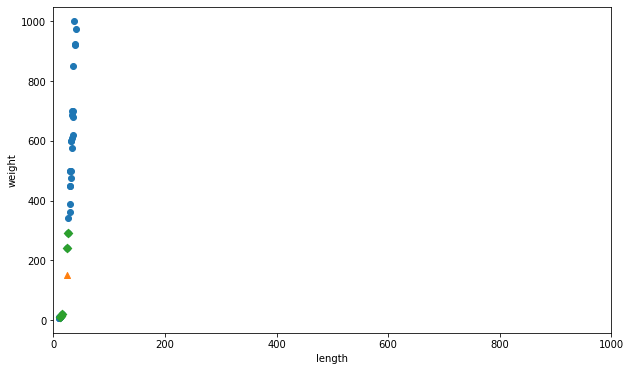

In [73]:
distances, indexes = kn.kneighbors([[25,150]])

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(train_input[:,0], train_input[:,1])
ax.scatter(25,150,marker = '^')
ax.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
ax.set_xlim((0, 1000))

ax.set_xlabel('length')
ax.set_ylabel('weight')

plt.show()

- 두가지 수치 데이터가 있음
  + length : cm 단위
  + weight : g 단위

- 데이터 전처리 (Data Processing) = Feature Engineering

## Feature Engineering 맛보기
- 표준점수 (Z-Score) 화
  + 두개의 수치 데이터 단위 달라서, 단위를 통일.

In [74]:
mean = np.mean(train_input, axis = 0) # 평균
std = np.std(train_input, axis = 0) # 표준편차

print(mean, std)

[ 26.175      418.08888889] [ 10.21073441 321.67847023]


In [76]:
train_scaled = (train_input - mean) / std 
train_scaled

array([[ 0.37460577,  0.09920189],
       [ 0.27666962, -0.17125451],
       [ 0.34522492,  0.2546366 ],
       [-1.45680021, -1.27266487],
       [-1.40783213, -1.26862357],
       [-1.29030875, -1.26178444],
       [ 0.57047806,  0.56550602],
       [ 0.44316107,  0.2546366 ],
       [ 0.66841421,  0.87637544],
       [ 0.86428651,  0.87637544],
       [ 1.4519034 ,  1.73126635],
       [ 1.20706303,  1.56028817],
       [-0.07590051, -0.54740651],
       [-1.3882449 , -1.26924531],
       [ 1.30499918,  1.57583164],
       [ 0.34522492,  0.09920189],
       [ 1.06015881,  1.80898371],
       [ 0.47254192,  0.2546366 ],
       [-1.53514913, -1.2763953 ],
       [ 0.01224202, -0.39818919],
       [ 0.76635036,  0.82974503],
       [ 0.03182925, -0.24275448],
       [-1.52535551, -1.27794965],
       [-1.60370443, -1.27888226],
       [ 0.86428651,  0.81420156],
       [-1.46659382, -1.26924531],
       [ 0.47254192,  0.17691924],
       [ 0.81531843,  0.6276799 ],
       [ 0.71738229,

In [77]:
# 모델링 재학습
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [78]:
# 모형 평가 --> 100%
test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target)

1.0

In [80]:
# 새로운 데이터 --> 표준점수화
new = ([25,150]-mean) / std
new

array([-0.11507497, -0.83340638])

In [81]:
print(kn.predict([new]))

[1.]


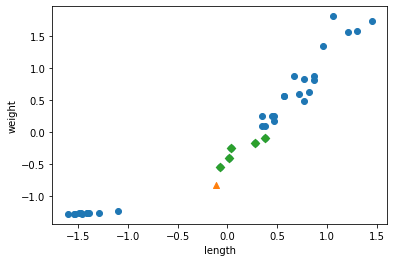

In [84]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0],new[1],marker = '^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')

plt.xlabel('length')
plt.ylabel('weight')

plt.show()